<a href="https://colab.research.google.com/github/YuLim2/BSSM_Data/blob/master/pandas_basic_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



---

# **해결문제**


RFID기반 음식물쓰레기 종량제 시스템을 채택한 지자체의  2017년7월~2020년7월까지의 지자체별 RFID음식물쓰레기 배출량를 분석하시오.

+ 광역시도별 음식물 쓰레기 배출량
+ 광역시도별 자료건수
+ 부산광역시 지지체별 음식물 쓰레기 배출량
+ 해운대구 월별 음식물 쓰레기 배출량


---

In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

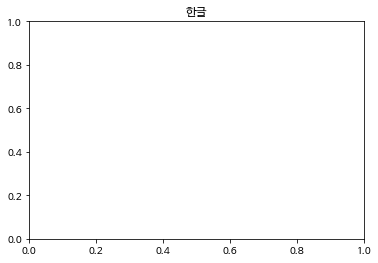

In [ ]:
plt.title('한글')
plt.show()

## 1. 데이터불러오기



In [ ]:
#pandas 라이브러리 추가
import pandas as pd

In [ ]:
#데이터불러오기
df = pd.read_csv('/content/drive/MyDrive/Data_python/2022_BSSM/data/지자체별 RFID음식물쓰레기 배출량.csv', engine='python',encoding='cp949')
df.head()

,배출연도,배출월,광역시도,기초지자체,배출량(톤)
0,2017,7,서울특별시,종로구,87260
1,2017,7,서울특별시,중구,189784
2,2017,7,서울특별시,용산구,6679
3,2017,7,서울특별시,성동구,296140
4,2017,7,서울특별시,광진구,166759


In [ ]:
#열명변경 : 배출연도->연도, 배출월->월, 배출량(톤)->배출량
df.columns = ['연도',	'월',	'광역시도',	'기초지자체',	'배출량']

## 2. 광역시도별 배출량

In [ ]:
import seaborn as sns

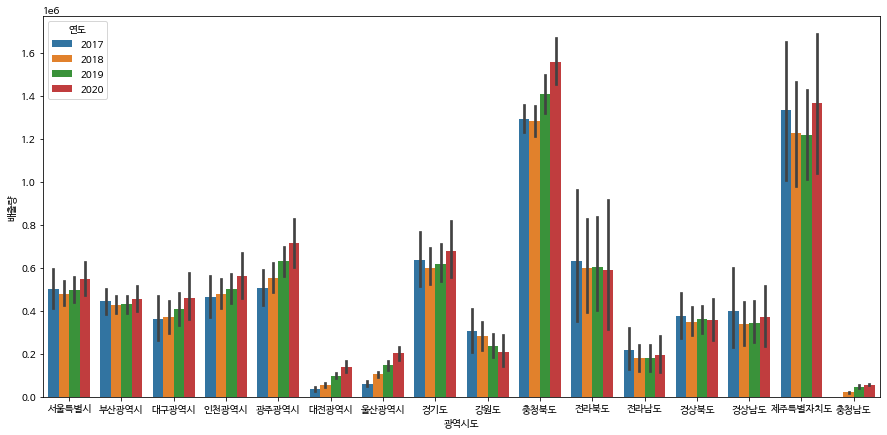

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='광역시도', y='배출량', hue='연도', data=df) 

## 3.광역시도별 자료 건수

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

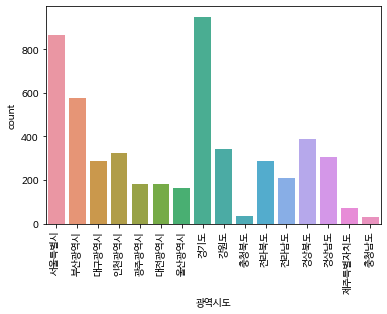

In [ ]:
sns.countplot(x='광역시도', data=df)
plt.xticks(rotation=90)

## 4.부산광역시 지자체별 음식물 쓰레기 배출량

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_python/2022_BSSM/data/부산RFID음식물쓰레기.csv', engine='python')
data.head()

,일자,요일,배출량,배출량비율,배출횟수,배출횟수비율,영역코드,시도명,시군구명
0,2019-01-01,3,258000,3.47,188,3.35,W0Q,부산광역시,중구
1,2019-01-02,4,273050,3.68,200,3.56,W0Q,부산광역시,중구
2,2019-01-03,5,254300,3.42,196,3.49,W0Q,부산광역시,중구
3,2019-01-04,6,241150,3.25,182,3.24,W0Q,부산광역시,중구
4,2019-01-05,7,234750,3.16,192,3.42,W0Q,부산광역시,중구


In [ ]:
data['연도'] = data['일자'][:4]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      11696 non-null  object 
 1   요일      11696 non-null  int64  
 2   배출량     11696 non-null  int64  
 3   배출량비율   11696 non-null  float64
 4   배출횟수    11696 non-null  int64  
 5   배출횟수비율  11696 non-null  float64
 6   영역코드    11696 non-null  object 
 7   시도명     11696 non-null  object 
 8   시군구명    11696 non-null  object 
 9   연도      4 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 913.9+ KB


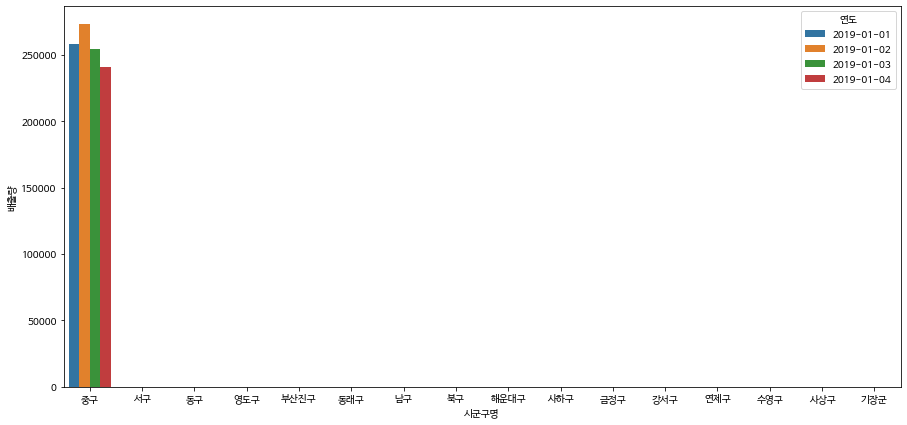

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='시군구명', y='배출량', hue='연도', data=data) 

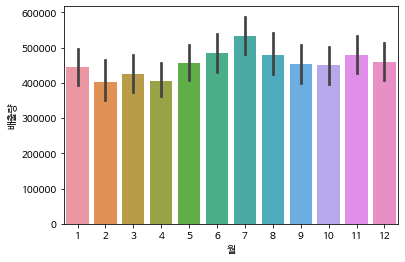

In [ ]:
sns.barplot(x='월', y='배출량', data=df) 